In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from numpy import log,sqrt
import sklearn
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments data sci/4/Salary Prediction/Salary_Data.csv')

In [15]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data visualisation

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

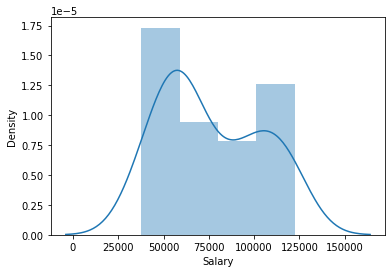

In [7]:
sns.distplot(data['Salary'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

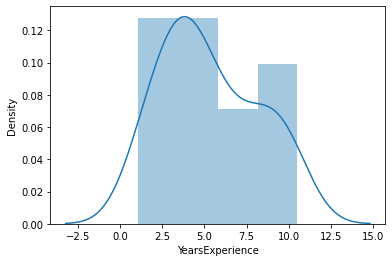

In [8]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

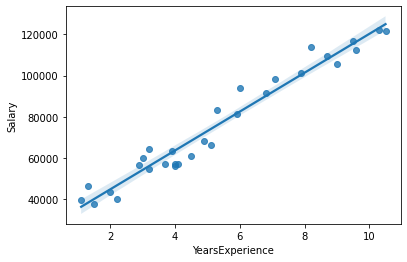

In [9]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [10]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Model Building

## We are going to build the model in 4 different forms 
### 1 Without transformation
### 2 Log transformation
### 3 Exponential transformation
### 4 Quadratic Transformation
### 5 Polinomial transformation 

### 1. Without Transfromation

In [11]:
model=smf.ols("Salary~YearsExperience",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        06:20:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Values

In [16]:
data_pred=pd.DataFrame(pd.Series([8.2,2.9]),columns=['YearsExperience'])
data_pred[]

,YearsExperience
0,8.2
1,2.9


In [20]:
matrix=pd.DataFrame(pd.Series([113812.0,56642.0]),columns=['Actual Values'])
matrix['Predicted without transform']=model.predict(data_pred)
matrix

,Actual Values,Predicted without transform
0,113812.0,103281.891235
1,56642.0,53197.090931


In [21]:
error_wo_trnsf= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted without transform']))
print('RMSE for the above model is:',error_wo_trnsf)

RMSE for the above model is: 7834.238607088583


### 2 Log Transform




In [23]:
data['log_exper']=np.log(data['YearsExperience'])
data

,YearsExperience,Salary,log_exper
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [24]:
model_log=smf.ols("Salary~log_exper",data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        06:33:11   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_exper   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Values

In [25]:
data_pred_log=pd.DataFrame(pd.Series([np.log(8.2),np.log(2.9)]),columns=['log_exper'])
data_pred_log

,log_exper
0,2.104134
1,1.064711


In [27]:
matrix['Predicted Value log']=model_log.predict(data_pred_log)
matrix


,Actual Values,Predicted without transform,Predicted Value log
0,113812.0,103281.891235,100317.918684
1,56642.0,53197.090931,58136.050079


In [28]:
error_log= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value log']))
print('RMSE for the above model is:',error_log)

RMSE for the above model is: 9600.062921441875


### 3 Exponential Transform

In [29]:
data['log_salary']=np.log(data['Salary'])
data

,YearsExperience,Salary,log_exper,log_salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


In [30]:
model_exp=smf.ols("log_salary~YearsExperience",data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        06:38:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_exper   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Values

In [32]:
data_pred_exp=pd.DataFrame(pd.Series([8.2,2.9]),columns=['YearsExperience'])
data_pred_exp

,YearsExperience
0,8.2
1,2.9


In [33]:
matrix['Predicted Value exp']=model_exp.predict(data_pred_exp)
matrix

,Actual Values,Predicted without transform,Predicted Value log,Predicted Value exp
0,113812.0,103281.891235,100317.918684,11.536116
1,56642.0,53197.090931,58136.050079,10.871215


In [34]:
error_exp= np.sqrt(metrics.mean_squared_error(np.log(matrix['Actual Values']),matrix['Predicted Value exp']))
print('RMSE for the above model is:',error_exp)

RMSE for the above model is: 0.09123418757734125


### 4. Quadratic Transformation

In [35]:
data['Sqr_exper']=data['YearsExperience']**2
data

,YearsExperience,Salary,log_exper,log_salary,Sqr_exper
0,1.1,39343.0,0.095310,10.580073,1.21
1,1.3,46205.0,0.262364,10.740843,1.69
2,1.5,37731.0,0.405465,10.538237,2.25
3,2.0,43525.0,0.693147,10.681091,4.00
4,2.2,39891.0,0.788457,10.593906,4.84
5,2.9,56642.0,1.064711,10.944506,8.41
6,3.0,60150.0,1.098612,11.004597,9.00
7,3.2,54445.0,1.163151,10.904946,10.24
8,3.2,64445.0,1.163151,11.073567,10.24
9,3.7,57189.0,1.308333,10.954117,13.69


In [36]:
model_quad=smf.ols("Salary~Sqr_exper+YearsExperience",data=data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.59e-19
Time:                        06:45:11   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
Sqr_exper          16.3926    152.121      0.108      0.915    -295.734     328.520
YearsExperience  9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Values

In [38]:
data_pred_quad=pd.DataFrame(pd.Series([8.2,2.9]),columns=['YearsExperience'])
data_pred_quad['Sqr_exper']=data_pred_quad['YearsExperience']**2
data_pred_quad

,YearsExperience,Sqr_exper
0,8.2,67.24
1,2.9,8.41


In [39]:
matrix['Predicted Value quad']=model.predict(data_pred_quad)
matrix

,Actual Values,Predicted without transform,Predicted Value log,Predicted Value exp,Predicted Value quad
0,113812.0,103281.891235,100317.918684,11.536116,103281.891235
1,56642.0,53197.090931,58136.050079,10.871215,53197.090931


In [40]:
error_quad= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value quad']))
print('RMSE for the above model is:',error_quad)

RMSE for the above model is: 7834.238607088583


### 5 Polynomial Transformation

In [41]:
data['cube_exper']=data['YearsExperience']**3
data

,YearsExperience,Salary,log_exper,log_salary,Sqr_exper,cube_exper
0,1.1,39343.0,0.095310,10.580073,1.21,1.331
1,1.3,46205.0,0.262364,10.740843,1.69,2.197
2,1.5,37731.0,0.405465,10.538237,2.25,3.375
3,2.0,43525.0,0.693147,10.681091,4.00,8.000
4,2.2,39891.0,0.788457,10.593906,4.84,10.648
5,2.9,56642.0,1.064711,10.944506,8.41,24.389
6,3.0,60150.0,1.098612,11.004597,9.00,27.000
7,3.2,54445.0,1.163151,10.904946,10.24,32.768
8,3.2,64445.0,1.163151,11.073567,10.24,32.768
9,3.7,57189.0,1.308333,10.954117,13.69,50.653


In [42]:
model_poly=smf.ols("Salary~cube_exper+Sqr_exper+YearsExperience",data=data).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     229.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           8.11e-19
Time:                        06:54:31   Log-Likelihood:                -298.93
No. Observations:                  30   AIC:                             605.9
Df Residuals:                      26   BIC:                             611.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.886e+04   7214.747      5.387      0.000     2.4e+04    5.37e+04
cube_exper       -122.9154     56.520     -2.175      0.039    -239.093      -6.737
Sqr_exper        2099.3519    968.355      2.168      0.040     108.869    4089.835
YearsExperience  -718.7084   4892.111     -0.147      0.884   -1.08e+04    9337.171
==============================================================================
Omnibus:                        2.261   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.849
Skew:                           0.470   Prob(JB):                        0.397
Kurtosis:                       2.228   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
data_pred_poly=pd.DataFrame(pd.Series([8.2,2.9]),columns=['YearsExperience'])
data_pred_poly['Sqr_exper']=data_pred_quad['YearsExperience']**2
data_pred_poly['cube_exper']=data_pred_quad['YearsExperience']**3
data_pred_poly

,YearsExperience,Sqr_exper,cube_exper
0,8.2,67.24,551.368
1,2.9,8.41,24.389


In [44]:
matrix['Predicted Value poly']=model_poly.predict(data_pred_poly)
matrix

,Actual Values,Predicted without transform,Predicted Value log,Predicted Value exp,Predicted Value quad,Predicted Value poly
0,113812.0,103281.891235,100317.918684,11.536116,103281.891235,106358.461550
1,56642.0,53197.090931,58136.050079,10.871215,53197.090931,51436.583277


In [45]:
error_poly= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value poly']))
print('RMSE for the above model is:',error_poly)

RMSE for the above model is: 6428.514551456679


In [46]:
a=[['Without trnasform',error_wo_trnsf],['Log transform',error_log],['Exponential transform',error_exp],['Quadratic Transform',error_quad],['Polynomial transform',error_poly]]
b=pd.DataFrame(a,columns=['Transfromation','RMSE'])
print('In conclusion the root mean sqaured value for different transforms are:')
print(b)

In conclusion the root mean sqaured value for different transforms are:
          Transfromation         RMSE
0      Without trnasform  7834.238607
1          Log transform  9600.062921
2  Exponential transform     0.091234
3    Quadratic Transform  7834.238607
4   Polynomial transform  6428.514551


## Hence looking at the above table we can make a choice as polynomial transform has the least error 